## 딥러닝 분류 모델 만들기
MNIST Modeified National of Standards and Technology 분류


In [2]:
# 필요한 모듈 임포트
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [4]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이트 정규화

load_data(): 데이터를 가지고 와 넘파이 배열로 저장 <br>
다운한 데이터의 픽셀 '0 ~ 225' 사이를 '0 ~ 1'의 실숫값으로 정규화

In [6]:
# tf.data를 사용하여 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

trainset과 testset을 나누고 샘플 수 설정

In [8]:
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='softmax'))

신경망 모델을 구성<br>
입력층 1개, 은닉층 2개, 출력층 1개의 **심층 신경망**

모델을 만드는 방법은 2 가지
- 순차모델 sequential model: 위 예제처럼 신경망 계층을 순차적으로 더함
- 함수형 모델 functional model: 신경망 계층을 함수로 정의하여 모델을 설계

입력층: Flatten(); 2차원 이미지를 평탄화 <br>
은닉층: Dense(); 출력 크기가 20, 활성화 함수로 ReLU<br>
출력층: Dense(); 출력 크기가 20, 활성화 함수로 softmax


In [9]:
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd',
#               metrics=['accuracy'])

오차를 계산하는 손실 함수: sparse_categorical_crossen<br>
오차를 보정하는 옵티마이저로: SGD

In [10]:
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
2100/2100 [==============================] - 7s 3ms/step - loss: 0.8429 - accuracy: 0.7610 - val_loss: 0.4078 - val_accuracy: 0.8820
Epoch 2/10
2100/2100 [==============================] - 7s 4ms/step - loss: 0.3731 - accuracy: 0.8934 - val_loss: 0.3175 - val_accuracy: 0.9087
Epoch 3/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.3106 - accuracy: 0.9118 - val_loss: 0.2889 - val_accuracy: 0.9152
Epoch 4/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2744 - accuracy: 0.9218 - val_loss: 0.2563 - val_accuracy: 0.9255
Epoch 5/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2456 - accuracy: 0.9288 - val_loss: 0.2266 - val_accuracy: 0.9362
Epoch 6/10
2100/2100 [==============================] - 6s 3ms/step - loss: 0.2232 - accuracy: 0.9354 - val_loss: 0.2155 - val_accuracy: 0.9377
Epoch 7/10
2100/2100 [==============================] - 7s 4ms/step - loss: 0.2083 - accuracy: 0.9403 - val_loss: 0.2021 - val_accuracy:

fit()함수를 사용하여 학습<br>
- epochs: 학습 횟수<br>
  클 경우 오버피팅(과적합)이 발생할 수 있음

In [11]:
# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)

모델 평가
313/313 [==============================] - 1s 3ms/step - loss: 0.1969 - accuracy: 0.9416


[0.19692374765872955, 0.9416000247001648]

keras의 evaluate()를 활용해 성능 평가<br>
인자: 테스트용 데이터셋

In [12]:
# 모델 정보 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
Total params: 16,540
Trainable params: 16,540
Non-trainable params: 0
_________________________________________________________________


모델의 구성 요소(계층 종류, 출력 상태) 출력

In [14]:
# 모델 저장
model.save('mnist_model.h5')

h3 파일 포맷으로 저장<br>
파일을 불러와서 사용하면 모델 구성과 학습 없이 빠르게 사용 가능

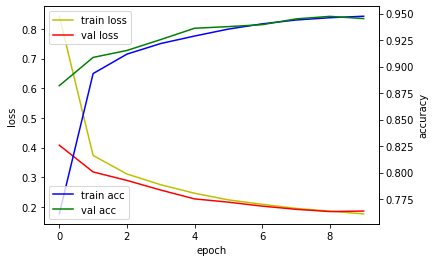

In [16]:
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

손실값 loss, 학습 정확도 accuracy

### 딥러닝 모델 사용하기
저장된 파일을 불러와 사용하는 방법<br>
실제 서비스에서는 파일을 불러와 객체를 생성한 후 입력한 데이터를 분류하거나 미래 데이터를 예측한다.<br>

In [17]:
# 필요한 모듈 임포트
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [18]:
# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 2.550

In [19]:
# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test,verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
Total params: 16,540
Trainable params: 16,540
Non-trainable params: 0
_________________________________________________________________
313/313 - 1s - loss: 12.0246 - accuracy: 0.9391 - 812ms/epoch - 3ms/step


[12.024635314941406, 0.9391000270843506]

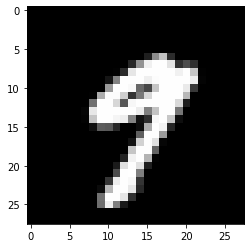

In [20]:
# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap="gray")
plt.show()

In [22]:
# 테스트셋의 20번째 이미지 클래스 분류
picks = [20]
y_prob = model.predict(x_test[picks])
predict = y_prob.argmax(axis=-1)
print("손글씨 이미지 예측값: ", predict)

손글씨 이미지 예측값:  [9]
